# Klasifikácia trás pomocou dát - Logistická regresia
V tejto časti sa budeme chcieť vytvoriť klasifikátor, ktorý bude priradzovať názov trasy pomocou získaných dát.
Začneme s logistickou regresiou - v ďalších 2 notebookoch sme použili náhodné lesy a rekurentnú neurónovú sieť s LSTM.

## Importy a definície


In [1]:
#imports
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression as LGR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from technicals import create_weekly_dataset, make_cycling_data, train_test_split_each_route, pd, np, classify

from sklearn.metrics import classification_report as CR, ConfusionMatrixDisplay
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

c:\Users\kubko\Documents\School\R_3\PRIDAV\PRIDAV-JPD\.venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
cycling_data = make_cycling_data()
cycling_data.head()

,NAZOV,ZEMEPISNA_SIRKA,ZEMEPISNA_DLZKA,SMER_DO,SMER_Z,DATUM_A_CAS,POCET_DO,POCET_Z,ObjectId,datum_a_cas,hodina,den_v_tyzdni,mesiac,spolu
0,Most Apollo,48.134661,17.127928,Centrum,Petržalka,2025/04/22 23:00:00+00,0,0,1,2025-04-22 23:00:00+00:00,23,1,4,0
1,Most Apollo,48.134661,17.127928,Centrum,Petržalka,2025/04/22 22:00:00+00,0,0,2,2025-04-22 22:00:00+00:00,22,1,4,0
2,Most Apollo,48.134661,17.127928,Centrum,Petržalka,2025/04/22 21:00:00+00,0,0,3,2025-04-22 21:00:00+00:00,21,1,4,0
3,Most Apollo,48.134661,17.127928,Centrum,Petržalka,2025/04/22 20:00:00+00,0,0,4,2025-04-22 20:00:00+00:00,20,1,4,0
4,Most Apollo,48.134661,17.127928,Centrum,Petržalka,2025/04/22 19:00:00+00,0,0,5,2025-04-22 19:00:00+00:00,19,1,4,0


## Bez týždňových okien

In [3]:
features = ['POCET_Z', 'POCET_DO', 'hodina', 'den_v_tyzdni', 'mesiac']
only_cycled = cycling_data[cycling_data["spolu"] > 0]


### Model

In [4]:
X_train, X_test, y_train, y_test = train_test_split(only_cycled[features], only_cycled['NAZOV'], test_size=0.2, random_state=42)
y_train, y_test, class_weight_dict, class_names = classify(y_train,y_test)
y_train = np.argmax(y_train, axis=1)
y_test = np.argmax(y_test, axis=1)
model1 = LGR(max_iter=1000, random_state=42)
model1.fit(X_train, y_train)

Klasifikujeme tieto lokality: ['Cyklomost' 'Devinska Nova Ves' 'Devínska cesta' 'Dolnozemská' 'Dunajská'
 'Einsteinova' 'Hradza' 'Most Apollo' 'Most SNP' 'Páričkova' 'River Park'
 'Starý Most' 'Trenčianska' 'Vajanského' 'Vajnorská' 'Viedenska'
 'Železná studnička'] 17


c:\Users\kubko\Documents\School\R_3\PRIDAV\PRIDAV-JPD\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multi

### Výsledok

c:\Users\kubko\Documents\School\R_3\PRIDAV\PRIDAV-JPD\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\kubko\Documents\School\R_3\PRIDAV\PRIDAV-JPD\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\kubko\Documents\School\R_3\PRIDAV\PRIDAV-JPD\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Presnosť klasifikácie:
                   precision    recall  f1-score   support

        Cyklomost       0.18      0.16      0.17     11346
Devinska Nova Ves       0.23      0.45      0.31      5712
   Devínska cesta       0.00      0.00      0.00      2107
      Dolnozemská       0.48      0.10      0.17      3950
         Dunajská       0.00      0.00      0.00      5080
      Einsteinova       0.00      0.00      0.00       982
           Hradza       0.09      0.00      0.00     11507
      Most Apollo       0.00      0.00      0.00      2560
         Most SNP       0.00      0.00      0.00      3288
        Páričkova       0.00      0.00      0.00      4397
       River Park       0.00      0.00      0.00      4613
       Starý Most       0.34      0.35      0.35      8696
      Trenčianska       0.00      0.00      0.00      1283
       Vajanského       0.00      0.00      0.00      5517
        Vajnorská       0.26      0.84      0.39      6052
        Viedenska       0.16    

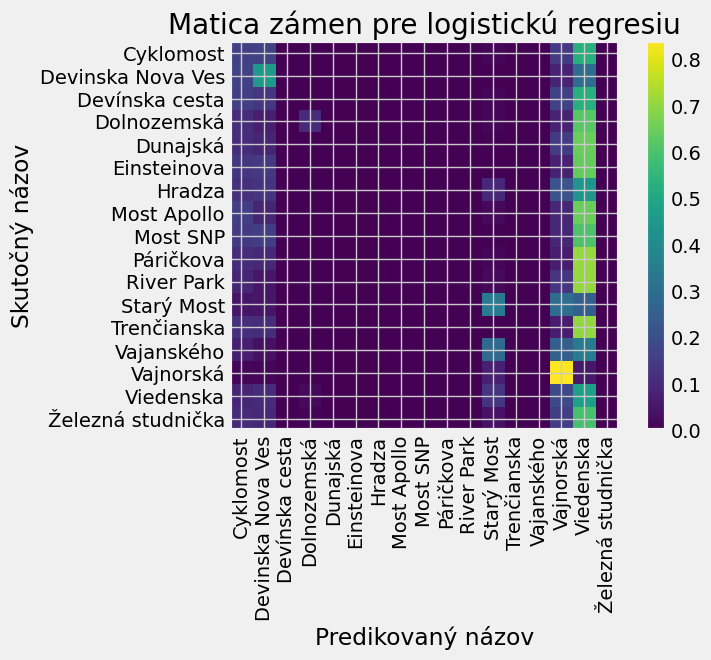

In [5]:
print("Presnosť klasifikácie:")
y_pred = model1.predict(X_test)
print(CR(y_test, y_pred, target_names=class_names))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='viridis', display_labels=class_names,
    xticks_rotation='vertical', include_values=False, normalize='true')
plt.title("Matica zámen pre logistickú regresiu")
plt.xlabel("Predikovaný názov")
plt.ylabel("Skutočný názov")
plt.show()

### Dôležitosti parametrov

In [7]:
importances = pd.Series(np.mean(np.abs(model1.coef_),axis=0), index=features).sort_values(ascending=False)
print("\nNajdôležitejšie faktory pre určenie názvu:")
print(importances)


Najdôležitejšie faktory pre určenie názvu:
POCET_Z         0.175796
POCET_DO        0.036810
mesiac          0.016059
den_v_tyzdni    0.011301
hodina          0.011292
dtype: float64


## Týždňové okná

In [8]:
X, y = create_weekly_dataset(cycling_data)
print(f"Počet vzoriek (triedy x týždne): {X.shape[0]}")
print(f"Počet príznakov (hodín) na vzorku: {X.shape[1]}")
print(f"Počet tried (cyklosčítačov): {np.unique(y).shape[0]}")

Počet vzoriek (triedy x týždne): 3786
Počet príznakov (hodín) na vzorku: 336
Počet tried (cyklosčítačov): 17


In [9]:
X_train, X_test, y_train, y_test = train_test_split_each_route(X, y, test_size=0.3)
y_train, y_test, class_weights_dict, class_names = classify(y_train, y_test)
y_train = np.argmax(y_train, axis=1)
y_test = np.argmax(y_test, axis=1)

Klasifikujeme tieto lokality: ['Cyklomost' 'Devinska Nova Ves' 'Devínska cesta' 'Dolnozemská' 'Dunajská'
 'Einsteinova' 'Hradza' 'Most Apollo' 'Most SNP' 'Páričkova' 'River Park'
 'Starý Most' 'Trenčianska' 'Vajanského' 'Vajnorská' 'Viedenska'
 'Železná studnička'] 17


### Model

In [10]:
model2  = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.92)),
    ('LGR', LGR(solver='lbfgs', max_iter=500, class_weight=class_weight_dict, random_state=42))
])
model2.fit(X_train, y_train)

c:\Users\kubko\Documents\School\R_3\PRIDAV\PRIDAV-JPD\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scaler', ...), ('pca', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"n_components n_components: int, float or 'mle', default=NoneNumber of components to keep.if n_components is not set all components are kept:: n_components == min(n_samples, n_features)If ``n_components == 'mle'`` and ``svd_solver == 'full'``, Minka'sMLE is used to guess the dimension. Use of ``n_components == 'mle'``will interpret ``svd_solver == 'auto'`` as ``svd_solver == 'full'``.If ``0 < n_components < 1`` and ``svd_solver == 'full'``, select thenumber of components such that the amount of variance that needs to beexplained is greater than the percentage specified by n_components.If ``svd_solver == 'arpack'``, the number of components must bestrictly less than the minimum of n_features and n_samples.Hence, the None case results in:: n_components == min(n_samples, n_features) - 1",0.92
,"copy copy: bool, default=TrueIf False, data passed to fit are overwritten and runningfit(X).transform(X) will not yield the expected results,use fit_transform(X) instead.",True
,"whiten whiten: bool, default=FalseWhen True (False by default) the `components_` vectors are multipliedby the square root of n_samples and then divided by the singular valuesto ensure uncorrelated outputs with unit component-wise variances.Whitening will remove some information from the transformed signal(the relative variance scales of the components) but can sometimeimprove the predictive accuracy of the downstream estimators bymaking their data respect some hard-wired assumptions.",False
,"svd_solver svd_solver: {'auto', 

### Výsleodok

                   precision    recall  f1-score   support

        Cyklomost       0.88      0.72      0.79       179
Devinska Nova Ves       0.57      0.91      0.70        96
   Devínska cesta       0.53      0.98      0.69        45
      Dolnozemská       1.00      0.69      0.82        52
         Dunajská       0.91      0.73      0.81        44
      Einsteinova       0.62      0.57      0.59        14
           Hradza       0.78      0.60      0.68       173
      Most Apollo       0.00      0.00      0.00        44
         Most SNP       0.43      0.67      0.53        45
        Páričkova       0.95      0.84      0.89        45
       River Park       0.78      0.88      0.83        52
       Starý Most       0.75      0.85      0.79        52
      Trenčianska       0.79      0.79      0.79        14
       Vajanského       0.85      0.73      0.79        30
        Vajnorská       0.59      0.76      0.66        45
        Viedenska       0.63      0.60      0.61       

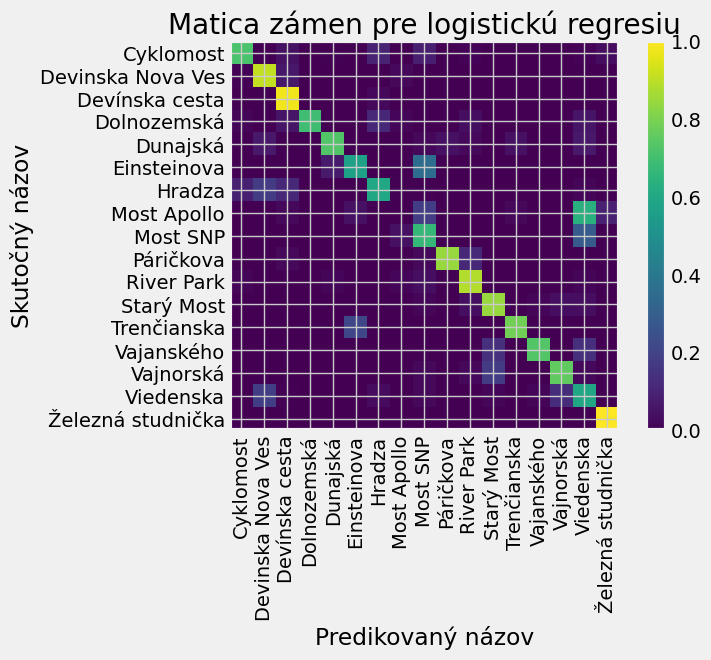

In [13]:
y_pred = model2.predict(X_test)

print(CR(y_test, y_pred, target_names=class_names))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='viridis', display_labels=class_names,
    xticks_rotation='vertical', include_values=False, normalize='true')
plt.title("Matica zámen pre logistickú regresiu")
plt.xlabel("Predikovaný názov")
plt.ylabel("Skutočný názov")
plt.show()

### Analýza dôležitosti 

In [55]:
columns = [h for h in range(336)]

# natrénované kroky z pipeline
pca_step = model2.named_steps['pca']
lgr_step = model2.named_steps['LGR']

# LGR koeficienty
lgr_coefs = lgr_step.coef_ 
# PCA koeficienty (komponenty zložené z atribútov)
pca_components = pca_step.components_ 

# tu dostaneme ku každému atribútu priemernú absolútnu dôležitosť (keďže sme štandardizovali tak je to relevantné)
original_feature_importance = np.mean(np.abs(np.dot(lgr_coefs, pca_components)),axis=0)

importance_df = pd.DataFrame(
    original_feature_importance.T, 
    index=columns, # Sem dosaď názvy tvojich stĺpcov
    columns=['Dôležitosť']
)
importances = importance_df.reset_index()

C:\Users\kubko\AppData\Local\Temp\ipykernel_2796\3471533189.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.barplot(data=importances.groupby(["Časť_dňa","Deň_názov"])["Dôležitosť"].mean().reset_index(), x="Deň_názov", y="Dôležitosť", hue="Časť_dňa")


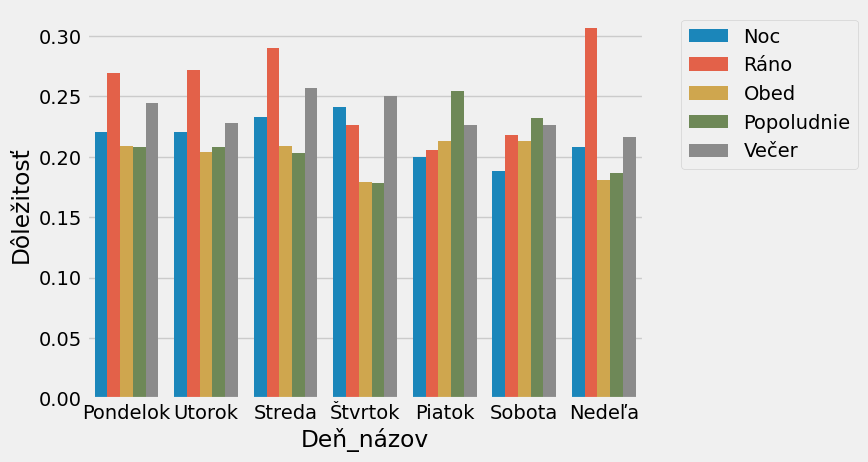

In [56]:
importances = importance_df.reset_index()
importances.columns = ['Hodina_z_do', 'Dôležitosť']
importances["Hodina"] = importances["Hodina_z_do"] % 168

importances["Smer"] = importances["Hodina_z_do"] // 168
importances["Smer"] = pd.Categorical(importances["Smer"].astype(str).replace({'0':'Z','1':'DO'}), categories=['Z','DO'], ordered=True)

importances["Deň"] = importances["Hodina"] // 24
importances["Deň_názov"] = importances["Deň"].astype(str).replace({'0':'Pondelok','1':'Utorok','2':'Streda','3':'Štvrtok','4':'Piatok','5':'Sobota','6':'Nedeľa'})
importances["Deň_názov"] = pd.Categorical(importances["Deň_názov"], categories=['Pondelok','Utorok','Streda','Štvrtok','Piatok','Sobota','Nedeľa'], ordered=True)

importances["Hodina_dňa"] = importances["Hodina"] % 24
importances["Časť_dňa"] = pd.cut(importances["Hodina_dňa"], bins=[-6,4,10,13,17,21,24], labels=['Noc','Ráno','Obed','Popoludnie', 'Večer', 'Noc_večer'])
importances["Časť_dňa"] = importances["Časť_dňa"].astype(str).replace('Noc_večer', 'Noc')
kategorie = ['Noc', 'Ráno', 'Obed', 'Popoludnie', 'Večer']
importances["Časť_dňa"] = pd.Categorical(importances["Časť_dňa"], categories=kategorie, ordered=True)

sns.barplot(data=importances.groupby(["Časť_dňa","Deň_názov"])["Dôležitosť"].mean().reset_index(), x="Deň_názov", y="Dôležitosť", hue="Časť_dňa")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')